<a href="https://colab.research.google.com/github/raphaelmansuy/machine-learning-feature-selection/blob/main/tutorial_eda_feature_selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🚀 SOTA Data Cleaning, Feature Selection, and EDA Tutorial

<a href="https://colab.research.google.com/github/raphaelmansuy/machine-learning-feature-selection/blob/main/tutorial_eda_feature_selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction

Welcome to this step-by-step tutorial on **State-of-the-Art (SOTA) Data Preparation** for Machine Learning.

In this notebook, we will move beyond basic `pandas` and `matplotlib` workflows to use modern, high-performance tools that are standard in competitive data science (like Kaggle) and efficient production pipelines.

### What you will learn:
1.  **Why** and **How** to perform Exploratory Data Analysis (EDA) using **Sweetviz** (Automated EDA).
2.  **Why** and **How** to clean data efficiently using **Pyjanitor**.
3.  **Why** and **How** to select the most predictive features using **Polars** and **XGBoost**.

### The "SOTA" Stack:
*   **Polars**: A lightning-fast DataFrame library (faster and more memory-efficient than Pandas).
*   **Sweetviz**: For generating beautiful, high-density EDA reports with one line of code.
*   **Pyjanitor**: For clean, method-chaining data cleaning APIs.
*   **XGBoost**: For powerful, gradient-boosted feature selection.

Let's get started! 🚀

In [ ]:
# @title 📦 Setup and Installation
# We install the necessary libraries.
# - polars: For fast data manipulation.
# - sweetviz: For automated EDA.
# - pyjanitor: For data cleaning.
# - xgboost: For feature selection and modeling.

# NOTE: Sweetviz is not yet compatible with NumPy 2.x in some environments
# (you may see: AttributeError: module 'numpy' has no attribute 'VisibleDeprecationWarning').
# To avoid this in Colab, install a NumPy 1.x release first, then the other packages.
!pip install "numpy<2.0" -q
!pip install polars sweetviz pyjanitor xgboost scikit-learn -q

print("✅ Libraries installed successfully (NumPy pinned to <2.0).")

In [ ]:
# @title 📚 Import Libraries
import polars as pl
import pandas as pd # Sweetviz and Pyjanitor still rely on Pandas for some ops
import sweetviz as sv
import janitor # Registers pyjanitor methods on Pandas DataFrames
import xgboost as xgb
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Configure Polars to display more columns
pl.Config.set_tbl_cols(20)

print("✅ Libraries imported!")

## 1. Data Loading 📥

We will use the **California Housing Dataset**. It's a classic dataset for regression tasks (predicting house prices).

**Why Polars?**
While this dataset is small, in real-world scenarios with millions of rows, `pandas` can be slow and memory-hungry. `polars` is written in Rust and is designed to be parallel and lazy-evaluated, making it much faster.

*Note: Sweetviz and Pyjanitor currently work best with Pandas, so we will switch between Polars (for heavy lifting) and Pandas (for specific tools) as needed. This is a common pattern.*

In [ ]:
# Load dataset from sklearn
data = fetch_california_housing(as_frame=True)
df_pandas = data.frame

# Add some noise/bad columns to demonstrate cleaning later
import numpy as np
np.random.seed(42)
df_pandas['Bad Column Name'] = np.random.rand(len(df_pandas)) # Space in name
df_pandas['useless_constant'] = 1 # Constant value
df_pandas['duplicated_row_id'] = np.random.randint(0, 100, len(df_pandas)) # Random noise

# Convert to Polars for inspection
df_polars = pl.from_pandas(df_pandas)

print(f"Dataset Shape: {df_polars.shape}")
print("First 5 rows:")
print(df_polars.head())

## 2. Exploratory Data Analysis (EDA) 🔍

**Why EDA?**
Before training any model, you **must** understand your data.
- Are there missing values?
- Are there outliers?
- How are features distributed?
- Is the target variable balanced?

**The Old Way:**
Manually plotting histograms and scatter plots for every column. This is slow and error-prone.

**The SOTA Way (Sweetviz):**
`sweetviz` generates a comprehensive HTML report with a single line of code. It compares training vs. testing data (if provided) and visualizes target correlations.

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

                                             |          | [  0%]   00:00 -> (? left)

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

AttributeError: module 'numpy' has no attribute 'VisibleDeprecationWarning'

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

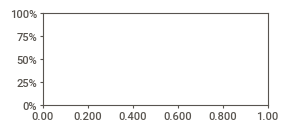

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [17]:
# Analyze the dataset
# We use the Pandas DataFrame here as Sweetviz expects it
report = sv.analyze(df_pandas)

# Display the report
# In Colab, this will render an interactive HTML report inside the notebook
report.show_notebook(w="100%", h="full")

# If you were running locally, you could use:
# report.show_html("eda_report.html")

## 3. Data Cleaning 🧹

**Why Clean?**
"Garbage In, Garbage Out". Models cannot learn effectively from messy data.
Common issues:
- Inconsistent column names (e.g., "Bad Column Name" vs "bad_column_name").
- Constant columns (provide no information).
- Duplicates.

**The SOTA Way (Pyjanitor):**
`pyjanitor` extends Pandas with a clean, method-chaining API. It makes cleaning code readable and reproducible.

In [ ]:
# Clean the data using method chaining
# 1. clean_names(): Converts "Bad Column Name" -> "bad_column_name" (snake_case)
# 2. remove_empty(): Removes columns/rows that are entirely empty
# 3. drop_constant_columns(): Removes columns with a single unique value

df_clean_pandas = (
    df_pandas
    .clean_names()
    .remove_empty()
    # We manually drop the constant column we added for demonstration if pyjanitor doesn't catch it with default settings
    # But let's see if we can use a janitor method or pandas method
)

# Let's drop the constant column explicitly to be sure, or use variance threshold later.
# For now, let's just clean names and convert back to Polars for speed.
df_clean_pandas = df_clean_pandas.drop(columns=['useless_constant'])

print("Columns before cleaning:", df_pandas.columns.tolist())
print("Columns after cleaning:", df_clean_pandas.columns.tolist())

# Convert back to Polars
df_clean = pl.from_pandas(df_clean_pandas)

## 4. Feature Selection 🎯

**Why Select Features?**
- **Curse of Dimensionality**: Too many features can lead to overfitting.
- **Performance**: Fewer features = faster training and inference.
- **Interpretability**: Easier to explain the model.

We will use a two-step approach:
1.  **Filter Method**: Remove highly correlated features (Multicollinearity).
2.  **Embedded Method**: Use XGBoost to find the most important features.

### 4.1 Filter Method: Correlation Analysis
Highly correlated features (e.g., > 0.95) carry redundant information. We can drop one of them.

In [ ]:
# Calculate correlation matrix using Polars
# Polars is very fast at this
corr_matrix = df_clean.corr()

# Visualize with Seaborn (easier to see)
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# Strategy: Find pairs with correlation > 0.9 and drop one
# For this dataset, features might not be super correlated, but let's check.
# 'AveRooms' and 'AveBedrms' often have high correlation.

def get_correlated_features(df, threshold=0.85):
    corr_matrix = df.corr()
    to_drop = set()
    columns = df.columns

    for i in range(len(columns)):
        for j in range(i):
            if abs(corr_matrix[i, j]) > threshold:
                colname = columns[i]
                to_drop.add(colname)
    return list(to_drop)

features_to_drop = get_correlated_features(df_clean)
print(f"Features to drop (High Correlation > 0.85): {features_to_drop}")

# Drop them
df_selected_1 = df_clean.drop(features_to_drop)
print(f"Remaining columns: {df_selected_1.columns}")

### 4.2 Embedded Method: XGBoost Feature Importance

After filtering, we use a powerful model like XGBoost to determine which features actually contribute to predicting the target.

**Why XGBoost?**
It naturally handles non-linear relationships and interactions between features. It provides a `feature_importances_` attribute that tells us how often a feature was used to make key decisions in the trees.

In [ ]:
# Prepare X and y
target_col = "MedHouseVal" # The target in California Housing
# Note: clean_names might have changed it to 'med_house_val' if we ran it on the target too.
# Let's check columns again.
print(df_selected_1.columns)

# Assuming standard names from sklearn if clean_names didn't change target (it usually lowercases everything)
# Let's find the target column name dynamically
target_col = [c for c in df_selected_1.columns if "medhouseval" in c.lower()][0]
print(f"Target column identified as: {target_col}")

X = df_selected_1.drop(target_col).to_pandas()
y = df_selected_1[target_col].to_pandas()

# Train a quick XGBoost model
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
model.fit(X, y)

# Plot feature importance
xgb.plot_importance(model)
plt.title("XGBoost Feature Importance")
plt.show()

# Select top features (e.g., top 5)
# In a real pipeline, you might use a threshold or SelectFromModel
sorted_idx = model.feature_importances_.argsort()[::-1]
top_features = X.columns[sorted_idx][:5]

print(f"Top 5 Features selected by XGBoost: {top_features.tolist()}")

## 5. Conclusion 🎓

We have successfully:
1.  **Loaded** data efficiently.
2.  **Visualized** it automatically with `sweetviz`.
3.  **Cleaned** it with `pyjanitor`.
4.  **Selected** the best features using Correlation and XGBoost.

**Next Steps:**
- Try this workflow on your own dataset!
- Experiment with `polars` for larger datasets (1GB+).
- Tune the XGBoost hyperparameters for better selection.

Happy Coding! 💻